In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import unidecode

from nltk import tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams

%matplotlib inline

reviews = pd.read_csv("../dataStorage/imdb-reviews-pt-br.csv")
classification = reviews["sentiment"].replace(["neg", "pos"], [0,1])
reviews["classification"] = classification
reviews

,id,text_en,text_pt,sentiment,classification
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [64]:
vectorizer = CountVectorizer(lowercase = False, max_features = 50)


bag_of_words = vectorizer.fit_transform(reviews.text_pt)

print(bag_of_words.shape)

(49459, 50)


In [65]:
def classify_text(text, text_column, classification_column):
    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizer.fit_transform(text[text_column])
    train, test, class_train, class_test = train_test_split(bag_of_words,
                                                              text[classification_column],
                                                              random_state = 42)
    logisticRegression = LogisticRegression(solver = "lbfgs")
    logisticRegression.fit(train, class_train)
    return logisticRegression.score(test, class_test)
print(classify_text(reviews, "text_pt", "classification"))

0.6583097452486858


In [66]:
def negative_cloud(text, text_column):
    negative_text = text.query("sentiment == 'neg'")
    all_words = ' '.join([text for text in negative_text[text_column]])

    word_cloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def positive_cloud(text, text_column):
    positive_text = text.query("sentiment == 'pos'")
    all_words = ' '.join([text for text in positive_text[text_column]])

    word_cloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

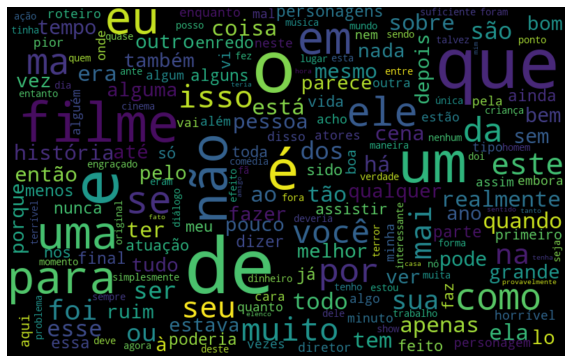

In [67]:
negative_cloud(reviews, "text_pt")

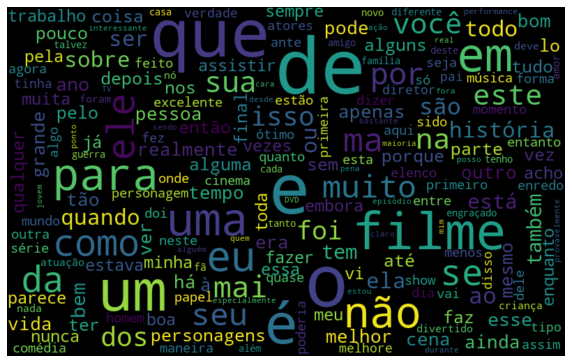

In [68]:
positive_cloud(reviews, "text_pt")

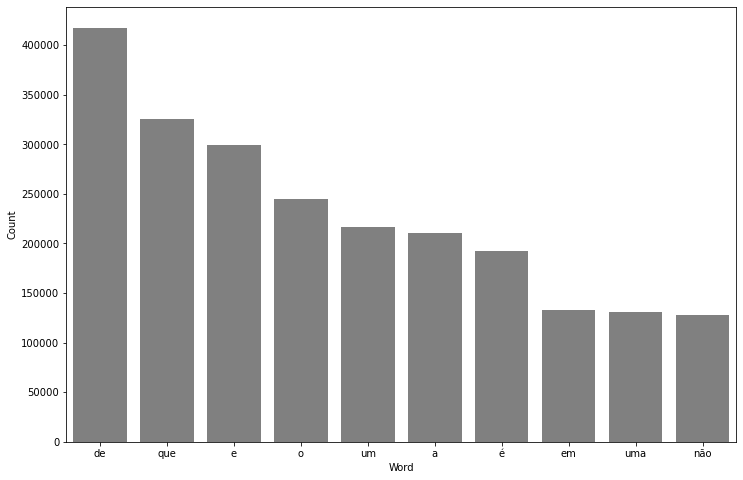

In [69]:
def graph_fun(text, text_column, amount):
    spaceToken = tokenize.WhitespaceTokenizer()
    all_words = ' '.join([text for text in text[text_column]])
    phrase_token = spaceToken.tokenize(all_words)
    frequency = nltk.FreqDist(phrase_token)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = amount)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'gray')
    ax.set(ylabel = "Count")
    plt.show()

graph_fun(reviews, "text_pt", 10)

In [70]:
stop_words = nltk.corpus.stopwords.words("portuguese")
spaceToken = tokenize.WhitespaceTokenizer()

proccess_phrase = list()
for opinion in reviews.text_pt:
    new_phrase = list()
    words_text = spaceToken.tokenize(opinion)
    for word in words_text:
        if word not in stop_words:
            new_phrase.append(word)
    proccess_phrase.append(' '.join(new_phrase))

reviews["treatment_1"] = proccess_phrase

In [71]:
reviews.head()

,id,text_en,text_pt,sentiment,classification,treatment_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [72]:
classify_text(reviews, "treatment_1", "classification")

0.6811160533764659

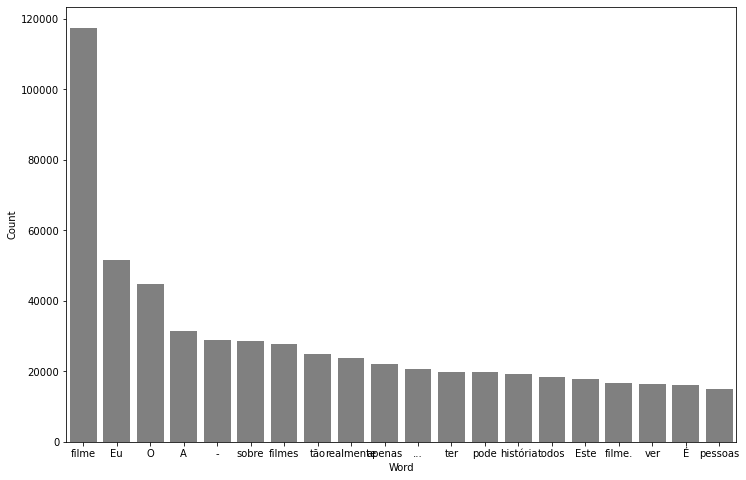

In [73]:
graph_fun(reviews,"treatment_1", 20)

In [74]:
tokenPunctuation = tokenize.WordPunctTokenizer()


pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

punctuation_stopwords = pontuacao + stop_words

proccess_phrase = list()
for opinion in reviews["treatment_1"]:
    new_phrase = list()
    words_text = tokenPunctuation.tokenize(opinion)
    for word in words_text:
        if word not in punctuation_stopwords:
            new_phrase.append(word)
    proccess_phrase.append(' '.join(new_phrase))
    
reviews["treatment_2"] = proccess_phrase

In [75]:
reviews.head()

,id,text_en,text_pt,sentiment,classification,treatment_1,treatment_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [76]:
no_symbols = [unidecode.unidecode(text) for text in reviews["treatment_2"]]

In [77]:
stopwords_no_symbols = [unidecode.unidecode(text) for text in punctuation_stopwords]

In [78]:
reviews["treatment_3"] = no_symbols

proccess_phrase = list()
for opinion in reviews["treatment_3"]:
    new_phrase = list()
    words_text = tokenPunctuation.tokenize(opinion)
    for word in words_text:
        if word not in stopwords_no_symbols:
            new_phrase.append(word)
    proccess_phrase.append(' '.join(new_phrase))
    
reviews["treatment_3"] = proccess_phrase

In [79]:
reviews.head()

,id,text_en,text_pt,sentiment,classification,treatment_1,treatment_2,treatment_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [80]:
accuracy_treatment3 = classify_text(reviews, "treatment_3", "classification")
print(accuracy_treatment3)

0.6887990295188031


In [81]:
tokenPunctuation = tokenize.WordPunctTokenizer()

proccess_phrase = list()
for opinion in reviews["treatment_3"]:
    new_phrase = list()
    opinion = opinion.lower()
    words_text = tokenPunctuation.tokenize(opinion)
    for word in words_text:
        if word not in stopwords_no_symbols:
            new_phrase.append(word)
    proccess_phrase.append(' '.join(new_phrase))
    
reviews["treatment_4"] = proccess_phrase

In [82]:
accuracy_treatment4 = classify_text(reviews, "treatment_4", "classification")
print(accuracy_treatment3)
print(accuracy_treatment4)

0.6887990295188031
0.6874241811564901


In [83]:
stemmer = nltk.RSLPStemmer()

proccess_phrase = list()
for opinion in reviews["treatment_4"]:
    new_phrase = list()
    words_text = tokenPunctuation.tokenize(opinion)
    for word in words_text:
        if word not in stopwords_no_symbols:
            new_phrase.append(stemmer.stem(word))
    proccess_phrase.append(' '.join(new_phrase))
    
reviews["treatment_5"] = proccess_phrase

In [84]:
accuracy_treatment5 = classify_text(reviews, "treatment_5", "classification")
print(accuracy_treatment5)
print(accuracy_treatment4)

0.6954306510311363
0.6874241811564901


In [85]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

tfidf_brute = tfidf.fit_transform(reviews["text_pt"])
train, test, class_train, class_test = train_test_split(tfidf_brute,
                                                              reviews["classification"],
                                                              random_state = 42)

logisticRegression = LogisticRegression(solver = "lbfgs")
logisticRegression.fit(train, class_train)
accuracy_tfidf_brute = logisticRegression.score(test, class_test)
print(accuracy_tfidf_brute)

0.6600889607763849


In [86]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

tfidf_treated = tfidf.fit_transform(reviews["treatment_5"])
train, test, class_train, class_test = train_test_split(tfidf_treated,
                                                              reviews["classification"],
                                                              random_state = 42)

logisticRegression = LogisticRegression(solver = "lbfgs")
logisticRegression.fit(train, class_train)
accuracy_tfidf_treated = logisticRegression.score(test, class_test)
print(accuracy_tfidf_treated)

0.6963202587949858


In [88]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vector_tfidf = tfidf.fit_transform(reviews["treatment_5"])
train, test, class_train, classtest = train_test_split(vector_tfidf,
                                                              reviews["classification"],
                                                              random_state = 42)

logisticRegression = LogisticRegression(solver = "lbfgs")
logisticRegression.fit(train, class_train)
accuracy_tfidf_ngrams = logisticRegression.score(test, class_test)
print(accuracy_tfidf_ngrams)

0.8856449656287909


In [92]:
tfidf = TfidfVectorizer(lowercase=False)
vector_tfidf = tfidf.fit_transform(reviews["treatment_5"])
train, test, class_train, class_test = train_test_split(vector_tfidf,
                                                              reviews["classification"],
                                                              random_state = 42)
logisticRegression = LogisticRegression(solver = "lbfgs")
logisticRegression.fit(train, class_train)
accuracy_tfidf = logisticRegression.score(test, class_test)
print(accuracy_tfidf)

0.8847553578649414


In [95]:
weights = pd.DataFrame(
    logisticRegression.coef_[0].T,
    index = tfidf.get_feature_names_out()
)

weights.nlargest(10,0)

,0
otim,8.308764
excel,7.992873
perfeit,6.548340
favorit,5.781070
maravilh,5.291923
incri,5.052462
hilari,4.653921
divert,4.552039
ador,4.409966
brilh,4.268854


In [96]:
weights.nsmallest(10,0)

,0
pi,-9.185322
ruim,-9.179967
horri,-8.761630
terri,-7.195886
chat,-6.921456
nad,-6.032698
infeliz,-5.297961
decepca,-4.984679
ridicul,-4.971187
parec,-4.939297
